<a href="https://colab.research.google.com/github/cristobalperezp/Marketing_2/blob/main/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2**
## Regresiones Lineales:
##### Integrantes: Cristóbal Pérez, Felipe Moreno, Jesús Farías

In [129]:
#importamos las librerías a ocupar:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [130]:
#cargamos las bases de datos:
!git clone https://github.com/cristobalperezp/Marketing_2.git

fatal: destination path 'Marketing_2' already exists and is not an empty directory.


In [131]:
df = pd.read_csv("/content/Marketing_2/Casas.csv", index_col=0)
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2927,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2928,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2929,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [132]:
#EDA:
#Forma del dataframe
df.shape

(2930, 81)

In [133]:
#Nombre de las columnas
df.columns

Index(['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'G

In [134]:
df = df[['Sale_Price','MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'Garage_Area',
       'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Pool_QC', 'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold',
       'Year_Sold', 'Sale_Type', 'Sale_Condition', 'Longitude',
       'Latitude']]

In [135]:
#Analizar na's
df.isna().sum()

Sale_Price        0
MS_SubClass       0
MS_Zoning         0
Lot_Frontage      0
Lot_Area          0
                 ..
Year_Sold         0
Sale_Type         0
Sale_Condition    0
Longitude         0
Latitude          0
Length: 81, dtype: int64

In [136]:
#Variables con valores faltantes:
mask = df.isna().sum() > 0
df_aux = df.copy()
df_aux = df_aux.loc[:,mask].isna().sum()
df_aux

Series([], dtype: float64)

In [137]:
#Tipo de valores por columna
df.dtypes

Sale_Price          int64
MS_SubClass        object
MS_Zoning          object
Lot_Frontage        int64
Lot_Area            int64
                   ...   
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Longitude         float64
Latitude          float64
Length: 81, dtype: object

In [138]:
#Numero de valores distintos por columna:
df.nunique()

Sale_Price        1032
MS_SubClass         16
MS_Zoning            7
Lot_Frontage       129
Lot_Area          1960
                  ... 
Year_Sold            5
Sale_Type           10
Sale_Condition       6
Longitude         2776
Latitude          2762
Length: 81, dtype: int64

In [139]:
#Estadísticas de variables numéricas:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Sale_Price,2930.0,180796.060,79886.692,12789.000,129500.000,160000.000,213500.000,755000.000
Lot_Frontage,2930.0,57.648,33.499,0.000,43.000,63.000,78.000,313.000
Lot_Area,2930.0,10147.922,7880.018,1300.000,7440.250,9436.500,11555.250,215245.000
Year_Built,2930.0,1971.356,30.245,1872.000,1954.000,1973.000,2001.000,2010.000
Year_Remod_Add,2930.0,1984.267,20.860,1950.000,1965.000,1993.000,2004.000,2010.000
Mas_Vnr_Area,2930.0,101.097,178.635,0.000,0.000,0.000,162.750,1600.000
BsmtFin_SF_1,2930.0,4.177,2.233,0.000,3.000,3.000,7.000,7.000
BsmtFin_SF_2,2930.0,49.705,169.142,0.000,0.000,0.000,0.000,1526.000
Bsmt_Unf_SF,2930.0,559.072,439.541,0.000,219.000,465.500,801.750,2336.000
Total_Bsmt_SF,2930.0,1051.256,440.968,0.000,793.000,990.000,1301.500,6110.000


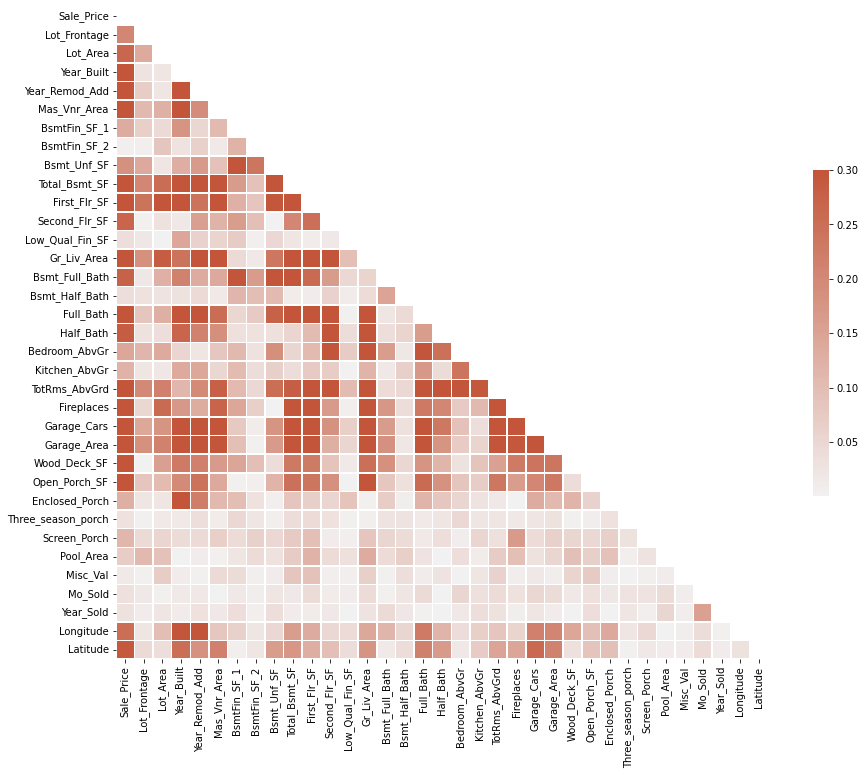

In [140]:
#Visualizaciones:
#Corrplot:

#Correlaciones:
corr = df.corr()

#mask para filtrar la diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))

#Configrara el tamaño del gráfico:
f, ax = plt.subplots(figsize=(16, 12))

#Generar un colormap:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Graficar el heatmap:
sns.heatmap(corr.abs(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

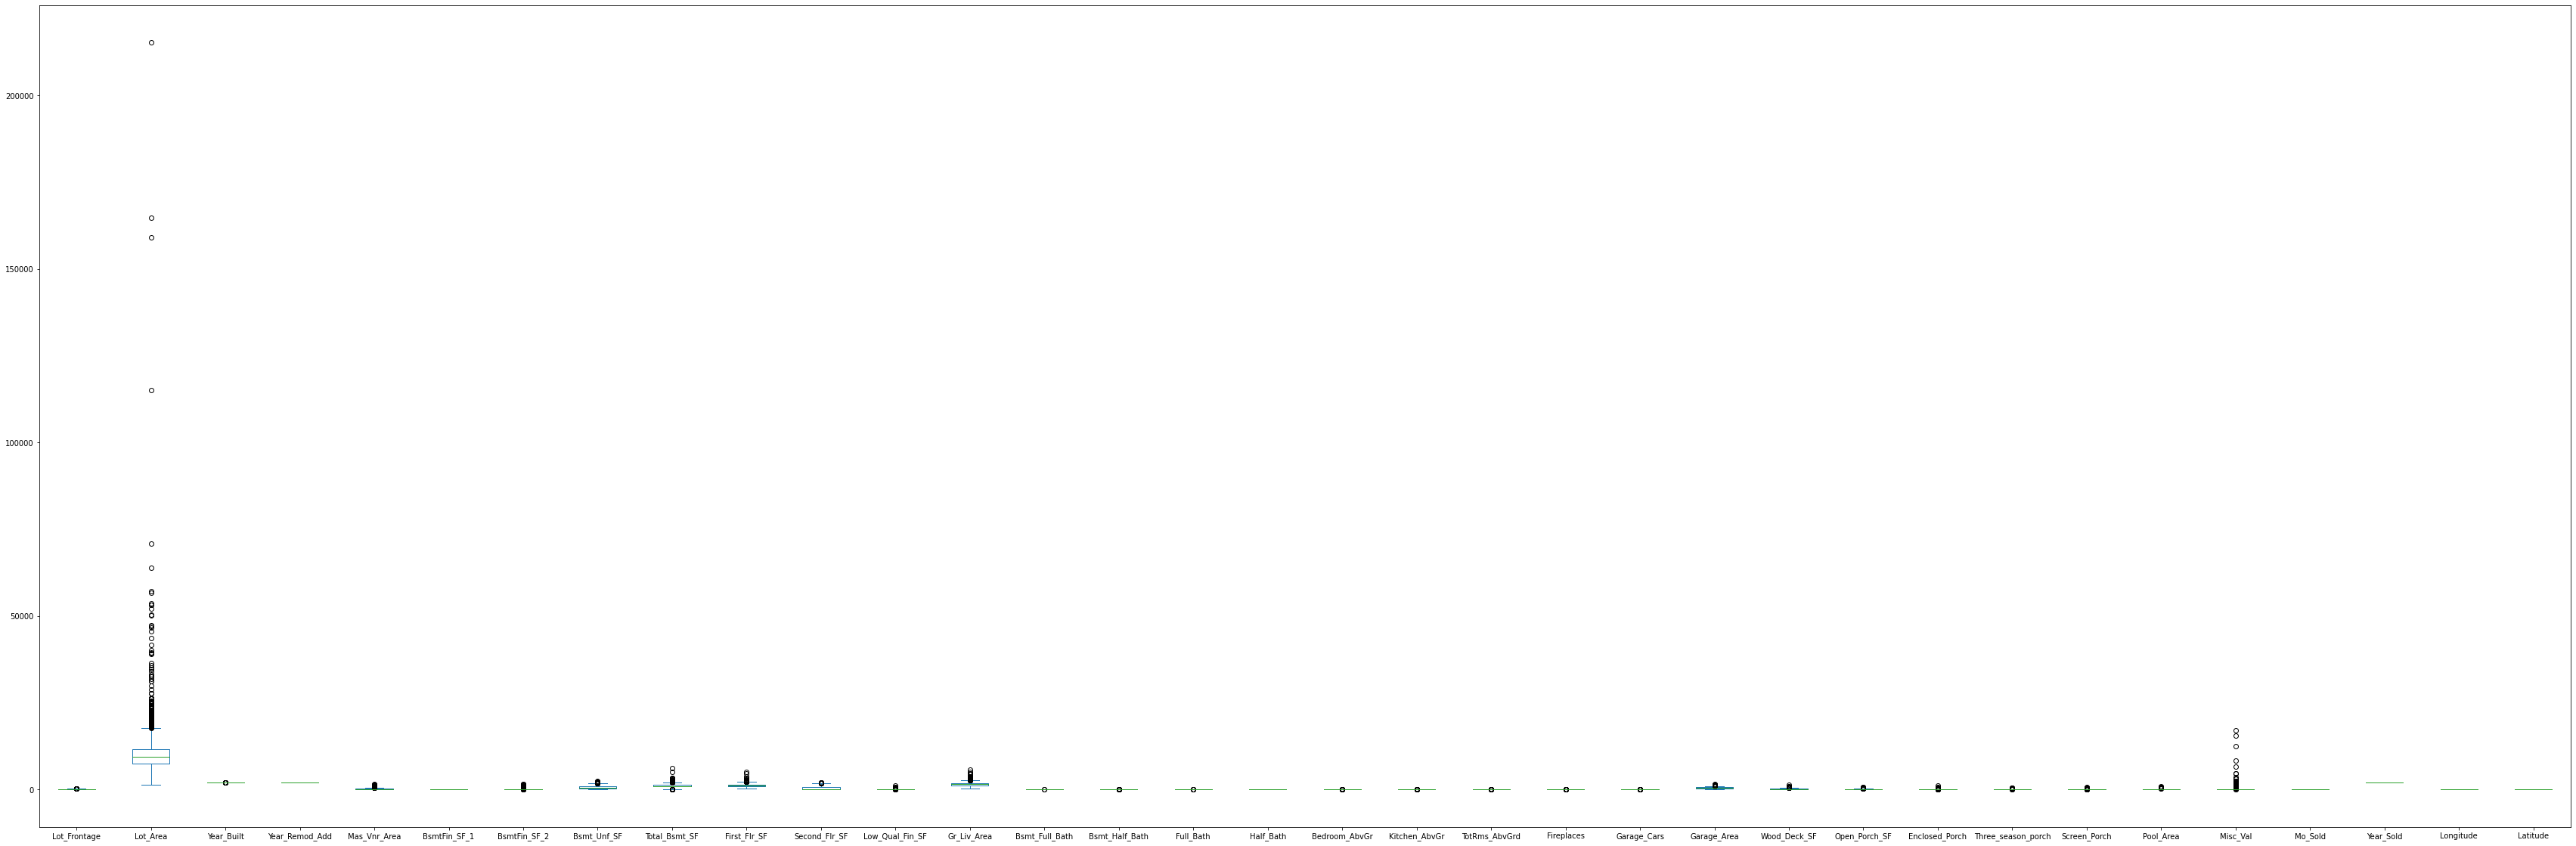

In [141]:
#Boxplot:

#Boxplot general de las variables numéricas:
df[['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'Garage_Area',
       'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Pool_QC', 'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold',
       'Year_Sold', 'Sale_Type', 'Sale_Condition', 'Longitude',
       'Latitude']].plot(kind='box',figsize=(60,20))

In [142]:
#Obtenemos las variables numéricas:
df_describe = df.describe().T.round(3)
#Lista con las variables numéricas
l_numeric = list(df_describe.index)
#Quitar Sale_Price:
l_numeric.remove('Sale_Price')

In [143]:
#Boxplots para Sale_Price, diferenciando por categorías:
#Obtenemos las variables categóricas:
s_columns = set(df.columns)
s_numeric = set(l_numeric)
l_categoric = list(s_columns-s_numeric)
l_categoric.remove('Sale_Price')


l_girar_texto = ['Neighborhood','Exterior_2nd', 'Exterior_1st']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

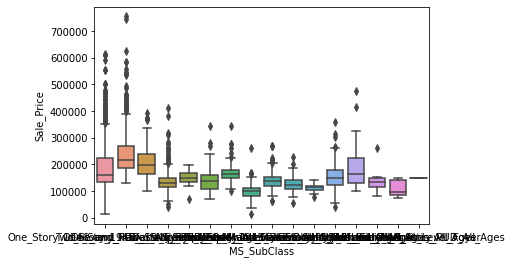

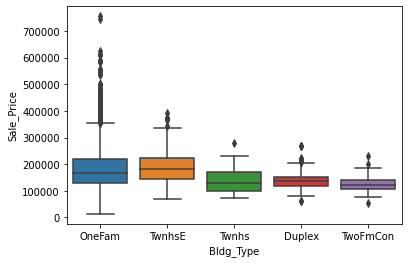

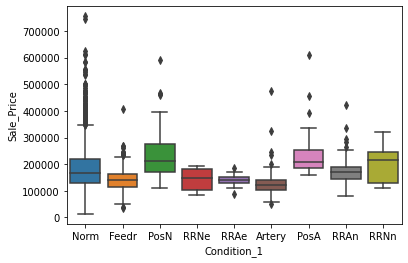

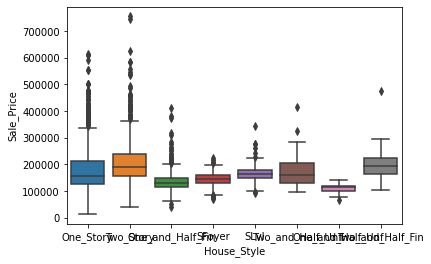

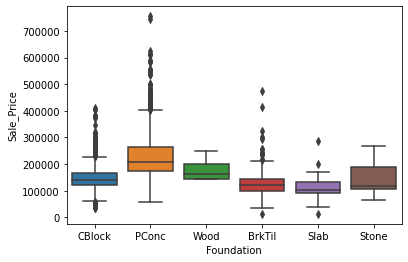

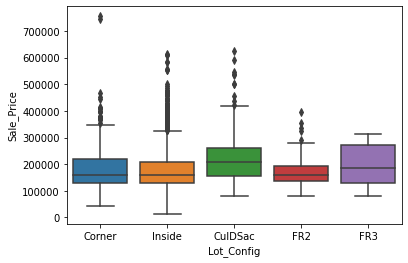

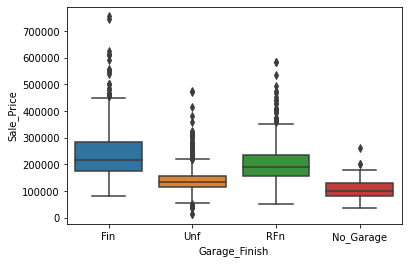

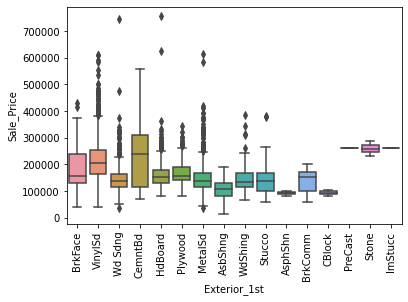

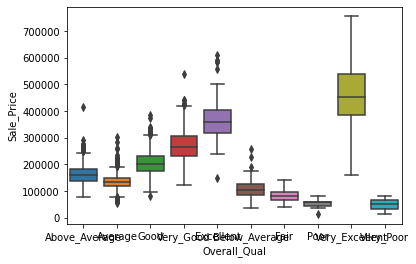

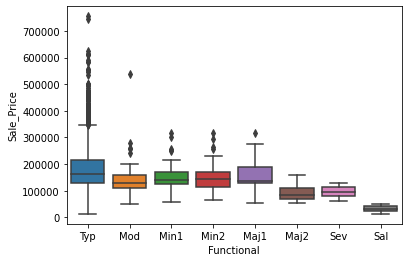

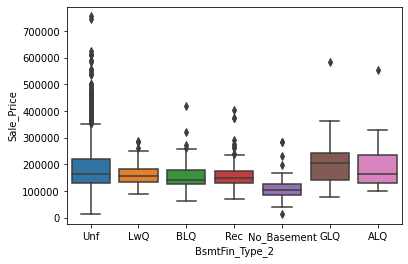

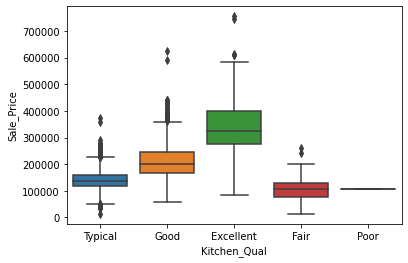

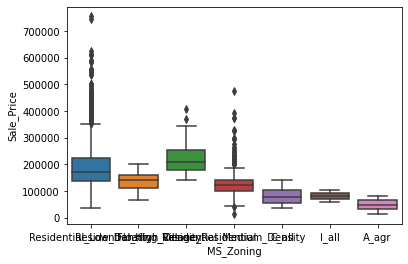

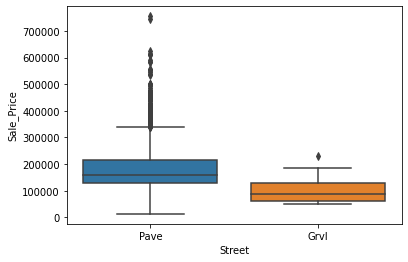

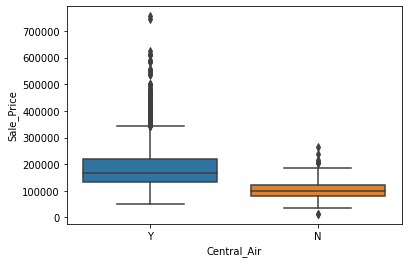

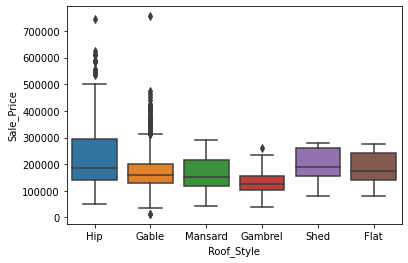

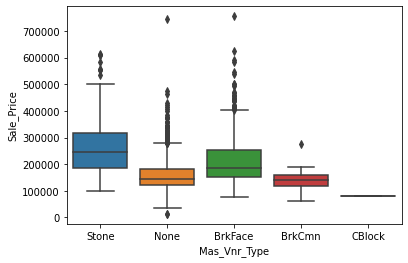

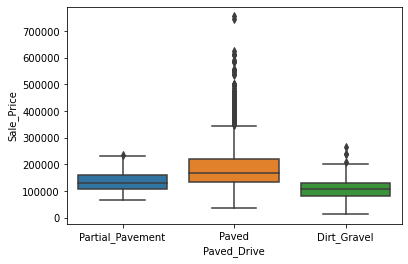

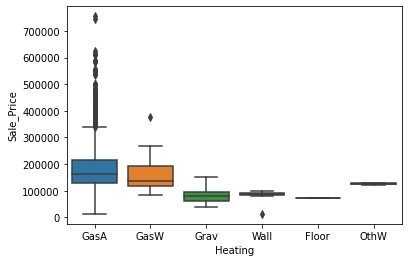

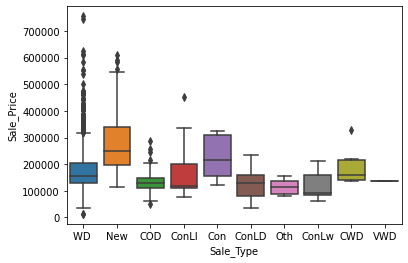

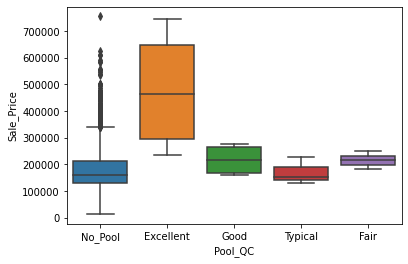

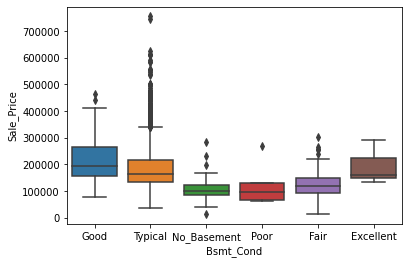

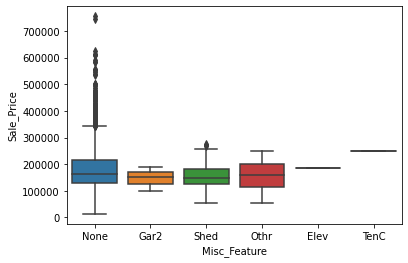

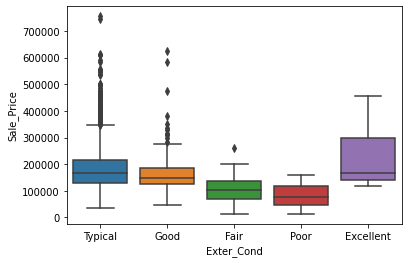

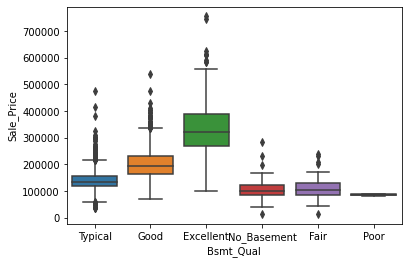

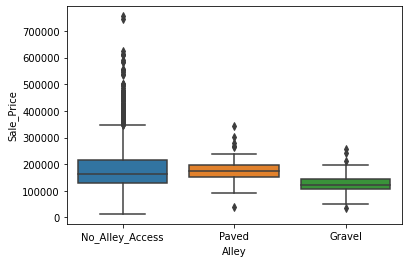

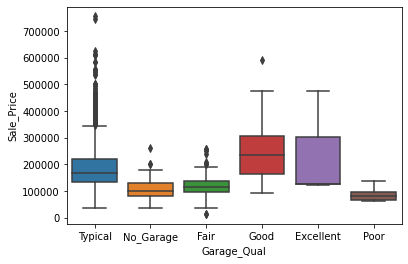

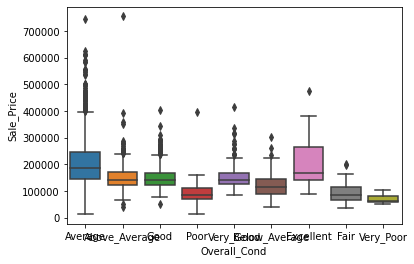

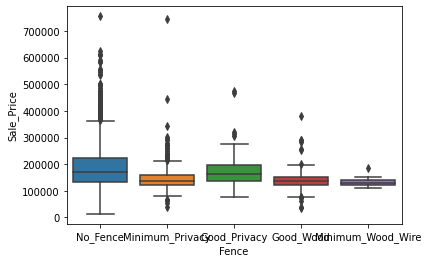

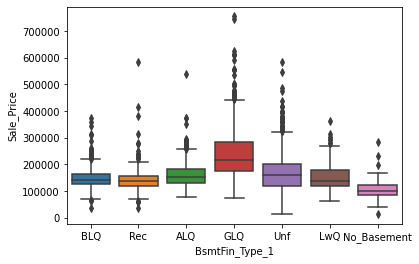

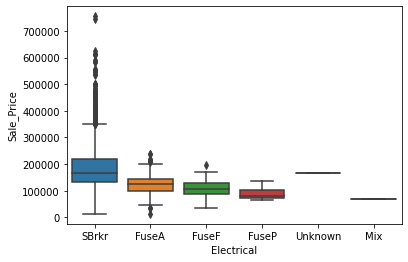

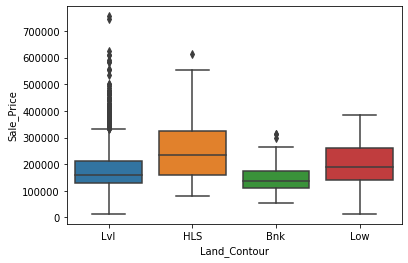

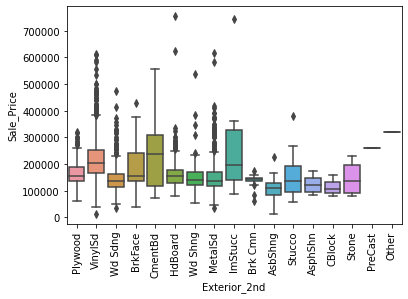

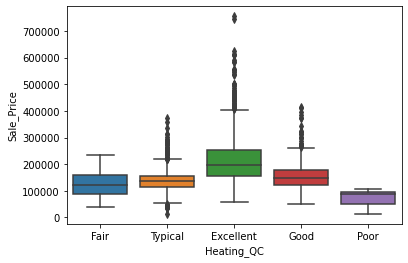

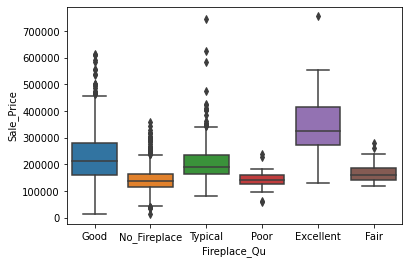

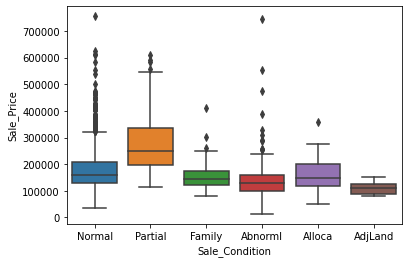

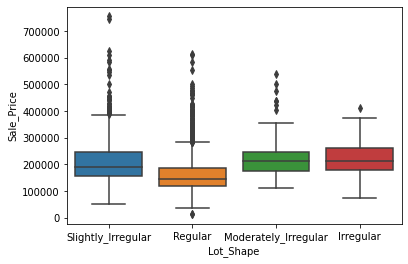

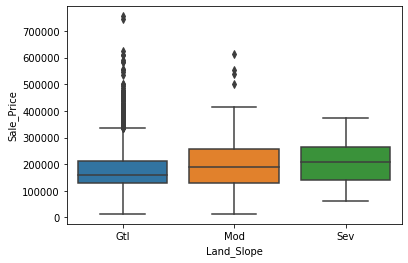

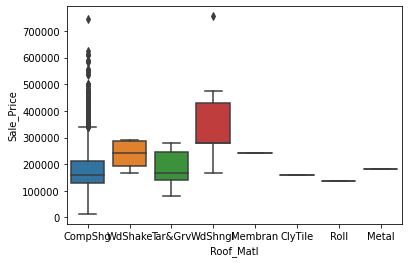

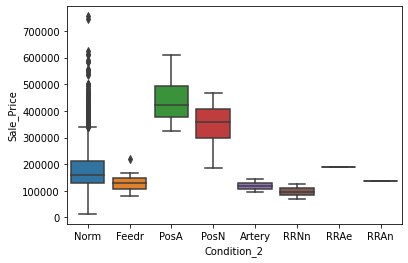

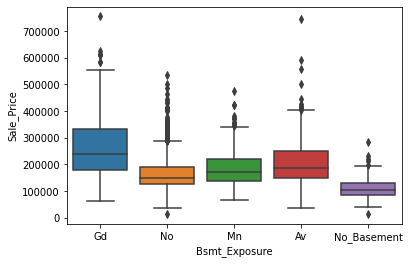

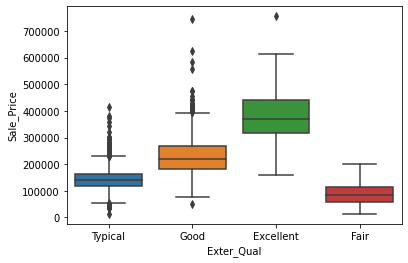

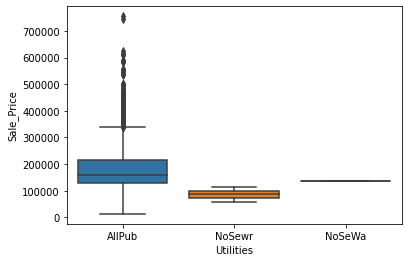

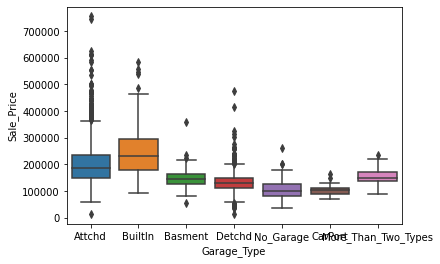

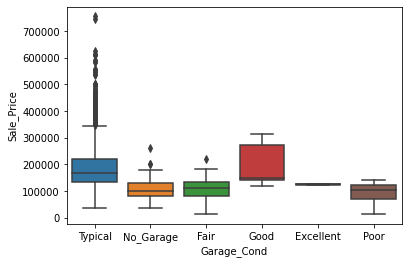

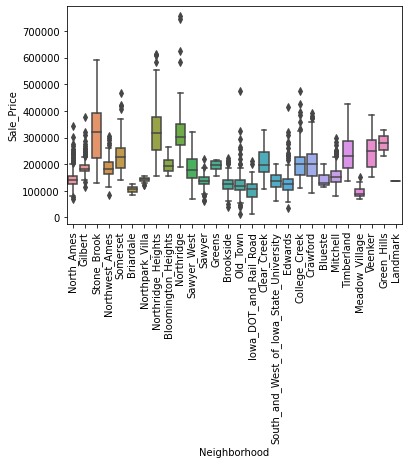

In [144]:
#Graficamos los boxplots
for i in l_categoric:
    plt.figure()
    if i in l_girar_texto:
      sns.boxplot(data = df, x = i, y='Sale_Price')
      plt.xticks(rotation=90)
    else:
      sns.boxplot(data = df, x = i, y='Sale_Price')

In [145]:
df.columns

Index(['Sale_Price', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod_Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'First_Flr_SF',
       'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish',
   

In [146]:
#Identificamos variables que presenten una correlación menor a 0,25 con Sale_Price
mask=corr['Sale_Price'].abs()<0.27
corr.loc[mask,'Sale_Price']

Lot_Frontage          0.201875
Lot_Area              0.266549
BsmtFin_SF_1         -0.134905
BsmtFin_SF_2          0.006018
Bsmt_Unf_SF           0.183308
Second_Flr_SF         0.269373
Low_Qual_Fin_SF      -0.037660
Bsmt_Half_Bath       -0.035817
Bedroom_AbvGr         0.143913
Kitchen_AbvGr        -0.119814
Enclosed_Porch       -0.128787
Three_season_porch    0.032225
Screen_Porch          0.112151
Pool_Area             0.068403
Misc_Val             -0.015691
Mo_Sold               0.035259
Year_Sold            -0.030569
Longitude            -0.251397
Name: Sale_Price, dtype: float64

In [147]:
#Creamos la lista:
l_remove = set(['Lot_Frontage','Lot_Area','BsmtFin_SF_1','BsmtFin_SF_2','Bsmt_Unf_SF','Second_Flr_SF','Low_Qual_Fin_SF',
'Bsmt_Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Enclosed_Porch','Three_season_porch',
'Screen_Porch','Pool_Area','Misc_Val','Mo_Sold','Year_Sold','Longitude'])

In [148]:
#Removemos las variables:
l_numeric = set(l_numeric)
regresores = list(l_numeric-l_remove)
regresores

['Garage_Area',
 'Fireplaces',
 'Latitude',
 'TotRms_AbvGrd',
 'Half_Bath',
 'First_Flr_SF',
 'Bsmt_Full_Bath',
 'Full_Bath',
 'Gr_Liv_Area',
 'Garage_Cars',
 'Wood_Deck_SF',
 'Year_Remod_Add',
 'Total_Bsmt_SF',
 'Open_Porch_SF',
 'Mas_Vnr_Area',
 'Year_Built']

In [149]:
#Aplicamos un segundo filtro, esta vez basado en la intuición sobre las variables restantes:
regresores = ['Year_Built',
 'Garage_Cars',
 'Half_Bath',
 'Full_Bath',
 'TotRms_AbvGrd',
 'First_Flr_SF',
 'Wood_Deck_SF',
 'Fireplaces',
 'Gr_Liv_Area']
regresores
['GrLivArea','TotRmsAbvGrd','YearBuilt','OpenPorchSF','Fireplaces','TotalBsmtSF',
 'FullBath','HalfBath','1stFlrSF','2ndFlrSF','LotFrontage','GarageCars']

['GrLivArea',
 'TotRmsAbvGrd',
 'YearBuilt',
 'OpenPorchSF',
 'Fireplaces',
 'TotalBsmtSF',
 'FullBath',
 'HalfBath',
 '1stFlrSF',
 '2ndFlrSF',
 'LotFrontage',
 'GarageCars']

In [150]:
### Numéricas, observando correlaciones ###

# variables	       correlación con Sale_Price

# LotArea          0.254536
# OverallCond     -0.038288
# BsmtFinSF2       0.010252
# BsmtUnfSF        0.226758
# LowQualFinSF    -0.049371
# BsmtFullBath     0.230019
# BsmtHalfBath    -0.009841
# BedroomAbvGr     0.210214
# KitchenAbvGr    -0.146942
# EnclosedPorch   -0.132880
# 3SsnPorch        0.025259
# ScreenPorch      0.136393
# PoolArea         0.020634
# MiscVal         -0.041639
# MoSold           0.057402
# YrSold          -0.045681

# Total: 16 numéricas

In [151]:
#Selección de variables:
X = df[regresores]
y = df[['Sale_Price']]

#logS=df[['Sale_Price']]
#logS['log_Sale'] = np.log(logS['Sale_Price'])
#df['log_Sale']=logS['log_Sale']

#y = df[['log_Sale']]

In [152]:
#Dividir entre muestra de train y test:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12345)

In [153]:
#Importamos el modelo de regresión lineal:
import statsmodels.api as sm
#OLS:
#Se agrega la constante:
X_train2 = sm.add_constant(X_train)
#Se crea el modelo:
ols_model = sm.OLS(y_train,X_train2)
#Se ajusta el modelo:
ols = ols_model.fit()
#Tabla resumen:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     703.7
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        03:04:45   Log-Likelihood:                -28239.
No. Observations:                2344   AIC:                         5.650e+04
Df Residuals:                    2334   BIC:                         5.656e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.544e+06   7.85e+04    -19.672

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [154]:
#Modelo:
from sklearn.linear_model import LinearRegression
#LinearRegression
# Se crea el modelo:
model = LinearRegression()
#Entregar los datos de entrenamiento para el modelo definido:
model.fit(X_train,y_train)

LinearRegression()

In [155]:
b = model.coef_[0]
b0 = model.intercept_[0]
regresores = X.columns
print("-------------------------------------------------------------")
print("Constante = ",b0,' \n')
print("-------------------------------------------------------------")
print("Regresores: \n")
for i in range(len(regresores)):
    print(regresores[i], '=',b[i],' \n')
print("-------------------------------------------------------------")

-------------------------------------------------------------
Constante =  -1543814.5494986773  

-------------------------------------------------------------
Regresores: 

Year_Built = 792.2690784173784  

Garage_Cars = 19802.892747953378  

Half_Bath = -7846.112204528328  

Full_Bath = -4869.458686094122  

TotRms_AbvGrd = -3372.4434633014043  

First_Flr_SF = 27.245487811860585  

Wood_Deck_SF = 38.54165831272121  

Fireplaces = 12128.636794869672  

Gr_Liv_Area = 78.46927357005916  

-------------------------------------------------------------


In [156]:
#R-cuadrado:
r2 = model.score(X_train,y_train)
print('R cuadrado de la regresión: ',r2)

R cuadrado de la regresión:  0.7307212013069848


In [157]:
#Obtener los valores estimados para el modelo:
predictions_in_sample = model.predict(X_train)
predictions_out_of_sample = model.predict(X_test)

In [158]:
prediction_train = []
for i in range(len(predictions_in_sample)):
    prediction_train.append(predictions_in_sample[i][0])
# prediction_train

In [159]:
prediction_test = []
for i in range(len(predictions_out_of_sample)):
    prediction_test.append(predictions_out_of_sample[i][0])
# prediction_test

In [160]:
#Métricas:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [161]:
#train metrics:
Error_absoluto_medio_entrenamiento_MAE_ = mean_absolute_error(y_pred= predictions_in_sample, y_true= y_train) 
Error_porcentual_medio_entrenamiento_MAPE = np.mean(np.abs((y_train - predictions_in_sample) / y_train)) * 100
Error_cuaratico_medio_entrenamiento_RMSE = np.sqrt(mean_squared_error(y_pred=predictions_in_sample, y_true= y_train))

#test metrics:
Error_absoluto_medio_validacion_MAE = mean_absolute_error(y_pred= predictions_out_of_sample, y_true= y_test) 
Error_porcentual_medio_validacion_MAPE = np.mean(np.abs((y_test - predictions_out_of_sample) / y_test)) * 100
Error_cuaratico_medio_validacion_RMSE = np.sqrt(mean_squared_error(y_pred=predictions_out_of_sample, y_true= y_test))

print(('Error absoluto dentro de muestra (MAE): {}').format(Error_absoluto_medio_entrenamiento_MAE_))
print(('Error porcentual dentro de muestra (MAPE): {}').format(Error_porcentual_medio_entrenamiento_MAPE[0]))
print(('Error cuadratico dentro de muestra (RMSE): {}').format(Error_cuaratico_medio_entrenamiento_RMSE))
print(' ')
print(('Error absoluto fuera de muestra (MAE): {}').format(Error_absoluto_medio_validacion_MAE))
print(('Error porcentual fuera de muestra (MAPE): {}').format(Error_porcentual_medio_validacion_MAPE[0]))
print(('Error cuadratico fuera de muestra (RMSE): {}').format(Error_cuaratico_medio_validacion_RMSE))

Error absoluto dentro de muestra (MAE): 27328.574714898543
Error porcentual dentro de muestra (MAPE): 16.640809363793448
Error cuadratico dentro de muestra (RMSE): 41290.87377093313
 
Error absoluto fuera de muestra (MAE): 27834.85602235347
Error porcentual fuera de muestra (MAPE): 15.79988076606825
Error cuadratico fuera de muestra (RMSE): 42061.10490319803


Text(0, 0.5, 'Train Predictions')

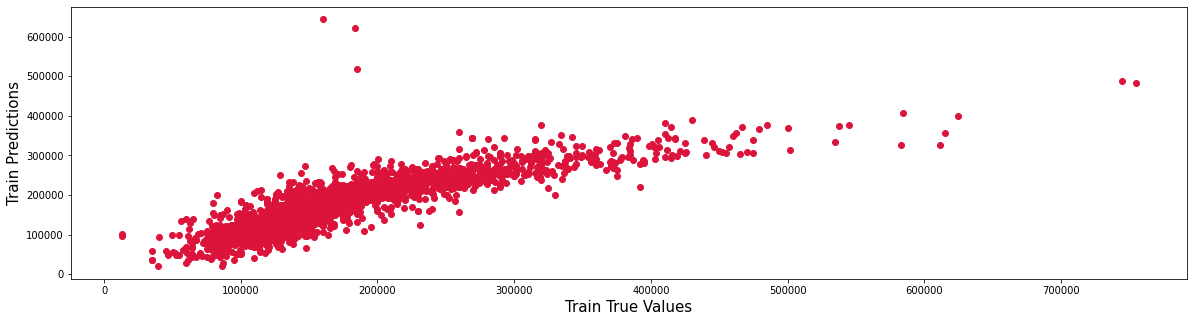

In [162]:
#pasamos los valores predichos a un vector
predictions = []
for i in range(len(predictions_in_sample)):
    predictions.append(predictions_in_sample[i])

#graficamos el scatter plot
plt.figure(figsize=(20,5))
plt.scatter(y_train,predictions,c='crimson')
plt.xlabel('Train True Values', fontsize=15)
plt.ylabel('Train Predictions', fontsize=15)

Text(0, 0.5, 'Test Predictions')

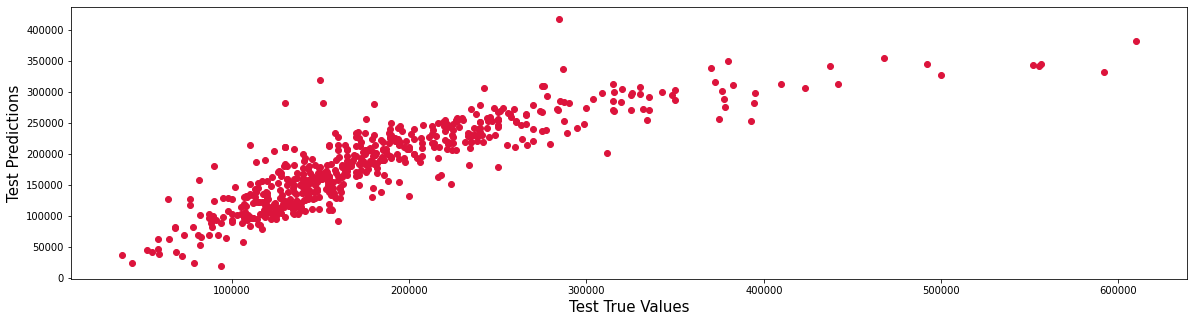

In [163]:
#pasamos los valores predichos a un vector
predictions = []
for i in range(len(predictions_out_of_sample)):
    predictions.append(predictions_out_of_sample[i])

#graficamos el scatter plot
plt.figure(figsize=(20,5))
plt.scatter(y_test,predictions,c='crimson')
plt.xlabel('Test True Values', fontsize=15)
plt.ylabel('Test Predictions', fontsize=15)